# Домашнее задание 2, задача 2. Поиск стока или треугольника

В этом ноутбуке требуется в данном *турнире* (ориентированном графе, в котором между каждыми двумя вершинами есть ребро ровно в одну сторону) найти либо сток, либо треугольник (ориентированный цикл на трех вершинах). Для этого можно воспользоваться алгоритмом с занятия, в котором находится сток или цикл. После этого можно найти цикл длины 3, воспользовавшись утверждением задачи 2.2.4 из теоретического листка.


---
**Правила сдачи.** Это вторая из двух задач домашнего задания 2. Каждая задача оценивается в 5 баллов.

Дедлайн второго домашнего задания --- **7 октября в 19:00**. Решения нужно отправить по адресу pygraphs.sber@gmail.com. Решения будут проверены до 19:00 8 октября. 

Также можно отправить решения до **19:00 5 октября**. Тогда они будут проверены до 19:00 6 октября и в случае наличия ошибок можно будет успеть их исправить до основного дедлайна.

---

In [69]:
# Добавляем библиотеки, определяем функцию для рисования графа

import networkx as nx
import matplotlib.pyplot as plt

pos = {'A': (1, 1.5), 'B': (4, 0), 'C': (5, 2), 'D': (2.9, 2.2), 'E': (6, 0.5), 'F': (7.5, 1.5)}

def draw_G(G, axis=False, pos=None):
    options = {
        "font_size": 20,
        "node_size": 1000,
        "node_color": "white",
        "edgecolors": "black",
        "linewidths": 1,
        "width": 1,
    }

    if axis:
        plt.axis([0, 20, -0.5, 2.7])
    plt.figure(figsize=(20, 20))
    nx.draw_networkx(G, pos, **options)
    plt.show()

In [70]:
# В этом блоке находим либо сток, либо цикл, это было реализовано на занятии

def sink(G, v):
    return len(G[v]) == 0


def find_cycle_or_sink(G, v):
    for _ in range(G.number_of_nodes()):
        if sink(G, v):
            return v
        v = list(G[v])[0]
    return v


def build_cycle(G, v):
    cycle = [ v ]
    while list(G[v])[0] != cycle[0]:
        u = list(G[v])[0]
        cycle.append(u)
        v = u
    return cycle

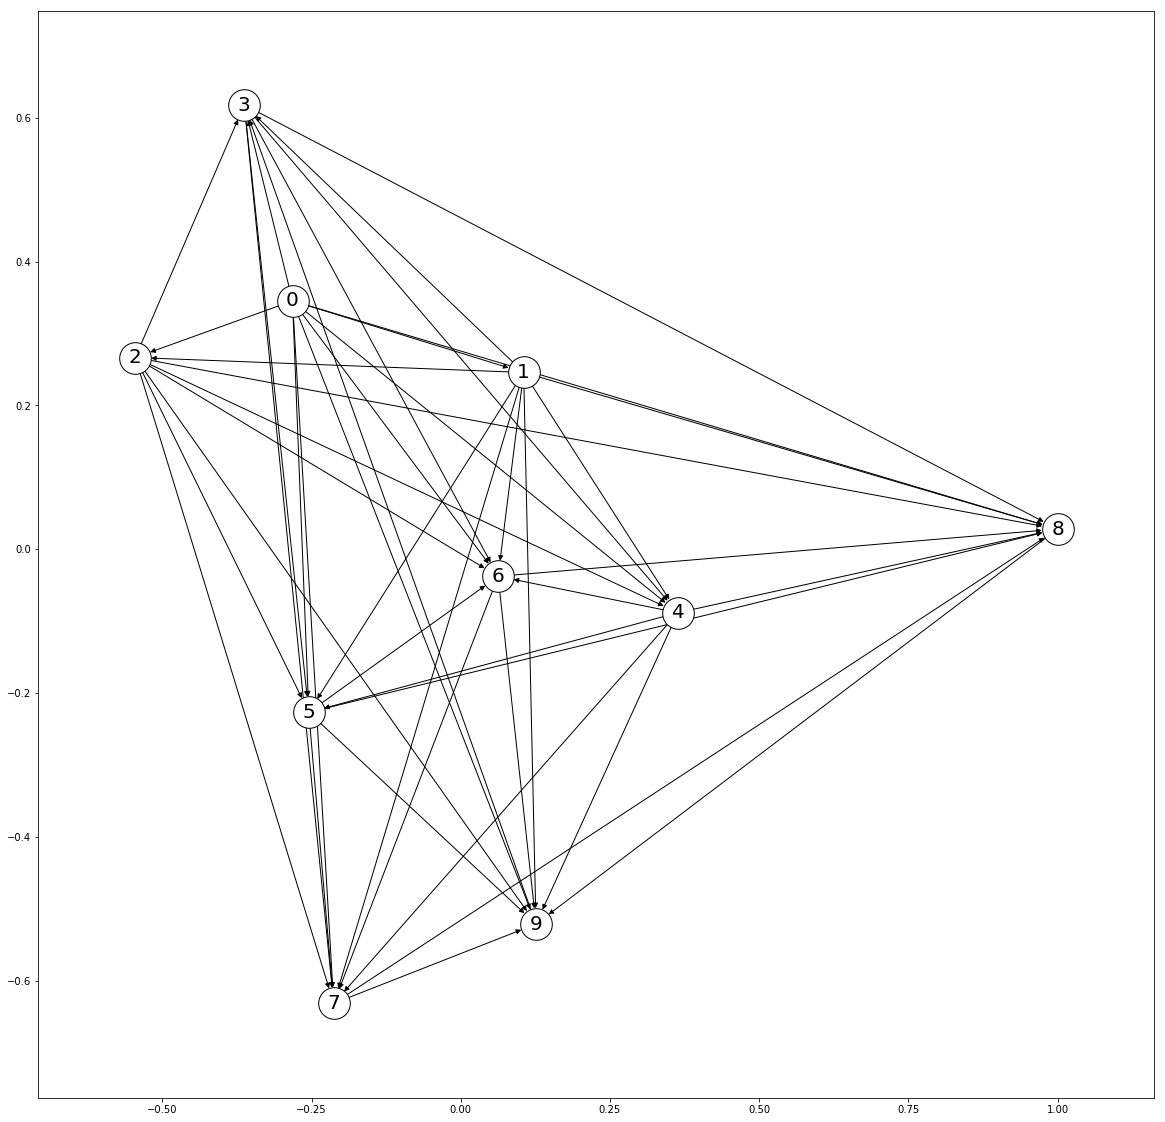

Цикл: [5, 6, 7, 8, 9, 3, 4]
Треугольник: (5, 9, 3)


In [81]:
# В этом блоке нужно реализовать поиск стока или треугольника

# Здесь задается случайный турнир
n = 10
H = nx.algorithms.tournament.random_tournament(n)
# draw_G(H)

# Здесь задается турнир, в котором почти является ациклическим, но ребро из стока в исток развернуто
# Этот турнир может быть полезен для тестирования
H = nx.DiGraph()
H.add_nodes_from(range(n))
for j in H.nodes():
    for i in range(j):
        if (i, j) == (3, 9):
            H.add_edge(j,i)  
        else:
            H.add_edge(i,j)
draw_G(H)

# В этой функции требуется реализовать поиск треугольника по данному циклу
def trim_cycle(G, cycle):
    # Добавьте здесь ваше решение
    v_0, v_i = cycle[0], cycle[1]
    for v_i_1 in cycle[2:]:
        if v_0 in set(G[v_i_1]): 
            return v_0, v_i, v_i_1
        else:
            v_i = v_i_1
        
    

# В этой части тестируется решение
v = find_cycle_or_sink(H, n - 1)
if sink(H, v):
    print(f'Сток: {v}')
else:
    cycle = build_cycle(H, v)
    print(f'Цикл: {cycle}')
    print(f'Треугольник: {trim_cycle(H, cycle)}')

In [82]:
H[5], H[9], H[3]

(AtlasView({6: {}, 7: {}, 8: {}, 9: {}}),
 AtlasView({3: {}}),
 AtlasView({4: {}, 5: {}, 6: {}, 7: {}, 8: {}}))